# Предобработка данных и создание новых признаков

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [ ]:
data = pd.read_csv('soccer1.csv')

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data['home_win'] = data['home_team_goal'] > data['away_team_goal']
data['away_win'] = data['away_team_goal'] > data['home_team_goal']
data['draw'] = data['home_team_goal'] == data['away_team_goal']
data['match_result'] = data[['home_win', 'away_win', 'draw']].idxmax(axis=1).map({
    'home_win': 0,
    'away_win': 1,
    'draw': 2
})

In [ ]:
data.head(5)

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,BSH,BSD,BSA,BWH,BWD,BWA,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,SJH,SJD,SJA,VCH,VCD,VCA,WHH,WHD,WHA,HT_buildUpPlaySpeed,HT_buildUpPlayDribbling,HT_buildUpPlayPassing,HT_buildUpPlayPositioningClass,HT_chanceCreationPassing,HT_chanceCreationCrossing,HT_chanceCreationShooting,HT_chanceCreationPositioningClass,HT_defencePressure,HT_defenceAggression,HT_defenceTeamWidth,HT_defenceDefenderLineClass,AT_buildUpPlaySpeed,AT_buildUpPlayDribbling,AT_buildUpPlayPassing,AT_buildUpPlayPositioningClass,AT_chanceCreationPassing,AT_chanceCreationCrossing,AT_chanceCreationShooting,AT_chanceCreationPositioningClass,AT_defencePressure,AT_defenceAggression,AT_defenceTeamWidth,AT_defenceDefenderLineClass,home_win,away_win,draw,match_result
0,24559,Switzerland,Switzerland Super League,2008/2009,1,2008-07-18,BSC Young Boys,FC Basel,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,1
1,24560,Switzerland,Switzerland Super League,2008/2009,1,2008-07-19,FC Aarau,FC Sion,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,0
2,24561,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20,FC Luzern,FC Vaduz,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,1
3,24562,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20,Neuchâtel Xamax,FC Zürich,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,1
4,24613,Switzerland,Switzerland Super League,2008/2009,2,2008-07-23,FC Basel,Grasshopper Club Zürich,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 68 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   id                                 25979 non-null  int64         
 1   country_name                       25979 non-null  object        
 2   league_name                        25979 non-null  object        
 3   season                             25979 non-null  object        
 4   stage                              25979 non-null  int64         
 5   date                               25979 non-null  datetime64[ns]
 6   home_team                          25979 non-null  object        
 7   away_team                          25979 non-null  object        
 8   home_team_goal                     25979 non-null  int64         
 9   away_team_goal                     25979 non-null  int64         
 10  B365H                             

In [ ]:
data.isnull().sum()

,0
id,0
country_name,0
league_name,0
season,0
stage,0
date,0
home_team,0
away_team,0
home_team_goal,0
away_team_goal,0


Работа с колонками букмекеров

In [ ]:
# Заполнение пропусков коэффициентов букмекеров
columns = [
    "B365H", "B365D", "B365A", "BSH", "BSD", "BSA", "BWH", "BWD", "BWA",
    "GBH", "GBD", "GBA", "IWH", "IWD", "IWA", "LBH", "LBD", "LBA",
    "PSH", "PSD", "PSA", "SJH", "SJD", "SJA", "VCH", "VCD", "VCA",
    "WHH", "WHD", "WHA"
]

home_cols = [col for col in data.columns if col.endswith("H")]
draw_cols = [col for col in data.columns if col.endswith("D")]
away_cols = [col for col in data.columns if col.endswith("A")]

def fill_missing_odds(data, cols):
    for col in cols:
        # Для каждого коэффициента (столбца) заполняем пропуски средним значением других коэффициентов той же группы
        data[col] = data.apply(lambda row: row[cols].mean() if pd.isna(row[col]) else row[col], axis=1)
    return data

In [ ]:
data = fill_missing_odds(data, home_cols)
data = fill_missing_odds(data, draw_cols)
data = fill_missing_odds(data, away_cols)

In [ ]:
# Преобразование коэффициентов букмекеров в вероятности
for col in columns:
  data[col] = 1 / data[col]

In [ ]:
# Заполняем пропуски для матчей где нет ни одного коэффициента букмекера
data[columns] = data[columns].fillna(0)

In [ ]:
# Создание колонки со среднием значением всех букмекеров
data['Home_Odds_Mean'] = data[home_cols].mean(axis=1)
data['Draw_Odds_Mean'] = data[draw_cols].mean(axis=1)
data['Away_Odds_Mean'] = data[away_cols].mean(axis=1)

Добавление статистика за последние матчи для команд

In [ ]:
def calculate_team_form(df, team_col, goals_col, win_col, draw_col, n_matches=5):
    # Создаем списки для метрик формы
    avg_goals_all = []
    wins_all = []
    draws_all = []

    # Обрабатываем каждую строку
    for i, row in df.iterrows():
        team = row[team_col]
        match_date = row["date"]

        # Фильтруем матчи команды до текущей даты
        past_matches = df[(df[team_col] == team) & (df["date"] < match_date)]

        # Считаем средние значения за последние n_matches
        last_matches = past_matches.tail(n_matches)
        avg_goals = last_matches[goals_col].mean() if not last_matches.empty else 0
        wins = last_matches[win_col].sum() if not last_matches.empty else 0
        draws = last_matches[draw_col].sum() if not last_matches.empty else 0

        avg_goals_all.append(avg_goals)
        wins_all.append(wins)
        draws_all.append(draws)

    return avg_goals_all, wins_all, draws_all


In [ ]:
# Средние значения для домашней команды
data["home_avg_goals"], data["home_wins"], data["home_draws"] = calculate_team_form(
    data, "home_team", "home_team_goal", "home_win", "draw", n_matches=5
)

# Средние значения для гостевой команды
data["away_avg_goals"], data["away_wins"], data["away_draws"] = calculate_team_form(
    data, "away_team", "away_team_goal", "away_win", "draw", n_matches=5
)

Заполнение пропусков и создание индексов аттрибутов команд

In [ ]:
team_attributes_numeric = [
    'HT_buildUpPlaySpeed', 'HT_buildUpPlayDribbling', 'HT_buildUpPlayPassing',
    'HT_chanceCreationPassing', 'HT_chanceCreationCrossing', 'HT_chanceCreationShooting',
    'HT_defencePressure', 'HT_defenceAggression', 'HT_defenceTeamWidth',
    'AT_buildUpPlaySpeed', 'AT_buildUpPlayDribbling', 'AT_buildUpPlayPassing',
    'AT_chanceCreationPassing', 'AT_chanceCreationCrossing', 'AT_chanceCreationShooting',
    'AT_defencePressure', 'AT_defenceAggression', 'AT_defenceTeamWidth',
]

# Заполнение пропусков медианными значениями
data[team_attributes_numeric] = data[team_attributes_numeric].apply(lambda x: x.fillna(x.median()))

In [ ]:
team_attributes_categorical = ['HT_buildUpPlayPositioningClass', 'HT_chanceCreationPositioningClass', 'HT_defenceDefenderLineClass',
                       'AT_buildUpPlayPositioningClass', 'AT_chanceCreationPositioningClass', 'AT_defenceDefenderLineClass']

# Заполнение пропусков самым частым значением (модой)
for col in team_attributes_categorical:
    data[col].fillna(data[col].mode()[0], inplace=True)

<ipython-input-20-f2439732483e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [ ]:
data["HT_buildUpPlayIndex"] = (
    data["HT_buildUpPlaySpeed"] + data["HT_buildUpPlayDribbling"] + data["HT_buildUpPlayPassing"]
) / 3

data["AT_buildUpPlayIndex"] = (
    data["AT_buildUpPlaySpeed"] + data["AT_buildUpPlayDribbling"] + data["AT_buildUpPlayPassing"]
) / 3

In [ ]:
data["HT_chanceCreationIndex"] = (
    data["HT_chanceCreationPassing"] + data["HT_chanceCreationCrossing"] + data["HT_chanceCreationShooting"]
) / 3

data["AT_chanceCreationIndex"] = (
    data["AT_chanceCreationPassing"] + data["AT_chanceCreationCrossing"] + data["AT_chanceCreationShooting"]
) / 3

In [ ]:
data["HT_defenceIndex"] = (
    data["HT_defencePressure"] + data["HT_defenceAggression"] + data["HT_defenceTeamWidth"]
) / 3

data["AT_defenceIndex"] = (
    data["AT_defencePressure"] + data["AT_defenceAggression"] + data["AT_defenceTeamWidth"]
) / 3

In [ ]:
data["buildUpPlayDiff"] = data["HT_buildUpPlayIndex"] - data["AT_buildUpPlayIndex"]
data["chanceCreationDiff"] = data["HT_chanceCreationIndex"] - data["AT_chanceCreationIndex"]
data["defenceDiff"] = data["HT_defenceIndex"] - data["AT_defenceIndex"]

Масштабирование и кодирование признаков

In [ ]:
# Подсчитываем количество пропущенных значений для каждого сезона
missing_values_by_league = data.groupby('season').apply(lambda group: group.isnull().sum())

print(missing_values_by_league)

           id  country_name  league_name  season  stage  date  home_team  \
season                                                                     
2008/2009   0             0            0       0      0     0          0   
2009/2010   0             0            0       0      0     0          0   
2010/2011   0             0            0       0      0     0          0   
2011/2012   0             0            0       0      0     0          0   
2012/2013   0             0            0       0      0     0          0   
2013/2014   0             0            0       0      0     0          0   
2014/2015   0             0            0       0      0     0          0   
2015/2016   0             0            0       0      0     0          0   

           away_team  home_team_goal  away_team_goal  B365H  B365D  B365A  \
season                                                                      
2008/2009          0               0               0      0      0      0   
2009/201

<ipython-input-25-4eb6114dacfb>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_by_league = data.groupby('season').apply(lambda group: group.isnull().sum())


In [ ]:
# Удаление старых сезонов из данных
data = data[~data['season'].isin(['2008/2009', '2009/2010'])]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Масштабируем вещественные столбцы
scaler = MinMaxScaler()

data[team_attributes_numeric] = scaler.fit_transform(data[team_attributes_numeric])

<ipython-input-27-063a8b37f979>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[team_attributes_numeric] = scaler.fit_transform(data[team_attributes_numeric])


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Кодируем категориальные признаки
label_encoder = LabelEncoder()

for col in team_attributes_categorical:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
data.sample(5)

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,BSH,BSD,BSA,BWH,BWD,BWA,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,SJH,SJD,SJA,VCH,VCD,VCA,WHH,WHD,WHA,HT_buildUpPlaySpeed,HT_buildUpPlayDribbling,HT_buildUpPlayPassing,HT_buildUpPlayPositioningClass,HT_chanceCreationPassing,HT_chanceCreationCrossing,HT_chanceCreationShooting,HT_chanceCreationPositioningClass,HT_defencePressure,HT_defenceAggression,HT_defenceTeamWidth,HT_defenceDefenderLineClass,AT_buildUpPlaySpeed,AT_buildUpPlayDribbling,AT_buildUpPlayPassing,AT_buildUpPlayPositioningClass,AT_chanceCreationPassing,AT_chanceCreationCrossing,AT_chanceCreationShooting,AT_chanceCreationPositioningClass,AT_defencePressure,AT_defenceAggression,AT_defenceTeamWidth,AT_defenceDefenderLineClass,home_win,away_win,draw,match_result,Home_Odds_Mean,Draw_Odds_Mean,Away_Odds_Mean,home_avg_goals,home_wins,home_draws,away_avg_goals,away_wins,away_draws,HT_buildUpPlayIndex,AT_buildUpPlayIndex,HT_chanceCreationIndex,AT_chanceCreationIndex,HT_defenceIndex,AT_defenceIndex,buildUpPlayDiff,chanceCreationDiff,defenceDiff
7202,20360,Scotland,Scotland Premier League,2010/2011,7,2010-10-02,Celtic,Hamilton Academical FC,3,1,0.854701,0.142857,0.066667,0.854701,0.153846,0.058824,0.869565,0.166667,0.076923,0.854701,0.166667,0.076923,0.869565,0.166667,0.076923,0.854701,0.142857,0.066667,0.856327,0.155172,0.068702,0.847458,0.166667,0.076923,0.847458,0.142857,0.066667,0.854701,0.153846,0.058824,0.833333,0.471698,0.833333,1,0.745763,0.833333,0.827586,1,0.755102,0.958333,0.930233,0,0.833333,0.471698,0.833333,1,0.830508,0.833333,0.655172,1,0.755102,0.854167,0.930233,0,True,False,False,0,0.856388,0.155810,0.069404,3.0,5,0,1.6,3,1,63.000000,63.0,68.333333,66.666667,66.666667,65.000000,0.000000,1.666667,1.666667
20319,12530,Italy,Italy Serie A,2014/2015,10,2014-11-01,Napoli,Roma,2,0,0.416667,0.303030,0.344828,0.419162,0.300558,0.331596,0.408163,0.303030,0.338983,0.419162,0.300558,0.331596,0.434783,0.303030,0.344828,0.421941,0.294118,0.348432,0.420168,0.286533,0.313480,0.419162,0.300558,0.331596,0.416667,0.294118,0.312500,0.416667,0.322581,0.322581,0.866667,0.943396,0.233333,1,0.932203,0.766667,0.879310,1,0.775510,0.729167,0.209302,0,0.783333,0.452830,0.300000,1,0.881356,0.733333,0.586207,0,0.265306,0.687500,0.093023,0,True,False,False,0,0.419254,0.300811,0.332042,3.2,3,1,1.0,2,1,60.000000,51.0,71.666667,64.333333,53.000000,42.333333,9.000000,7.333333,10.666667
22184,9836,Germany,Germany 1. Bundesliga,2014/2015,29,2015-04-19,VfL Wolfsburg,FC Schalke 04,1,1,0.588235,0.263158,0.200000,0.575185,0.262566,0.211034,0.588235,0.277778,0.200000,0.575185,0.262566,0.211034,0.571429,0.270270,0.243902,0.571429,0.250000,0.222222,0.564972,0.246305,0.207469,0.575185,0.262566,0.211034,0.571429,0.250000,0.210526,0.571429,0.285714,0.200000,0.633333,0.811321,0.416667,1,0.796610,0.666667,0.551724,1,0.734694,0.500000,0.395349,0,0.316667,0.566038,0.416667,1,0.355932,0.600000,0.327586,1,0.571429,0.562500,0.232558,0,False,False,True,2,0.575271,0.263092,0.211722,3.0,5,0,0.6,0,3,56.666667,46.0,60.666667,46.333333,51.333333,47.333333,10.666667,14.333333,4.000000
19854,24125,Spain,Spain LIGA BBVA,2014/2015,4,2014-09-21,Villarreal CF,Rayo Vallecano,4,2,0.653595,0.263158,0.153846,0.643382,0.249377,0.159781,0.625000,0.250000,0.166667,0.643382,0.249377,0.159781,0.666667,0.250000,0.163934,0.645161,0.250000,0.166667,0.641026,0.228833,0.149031,0.643382,0.249377,0.159781,0.636943,0.243902,0.153846,0.636943,0.263158,0.166667,0.250000,0.339623,0.250000,1,0.372881,0.616667,0.620690,1,0.571429,0.562500,0.604651,0,0.416667,0.528302,0.400000,1,0.389831,0.400000,0.431034,1,0.816327,0.562500,0.674419,0,True,False,False,0,0.643548,0.249718,0.160000,1.6,2,1,1.4,1,2,37.333333,47.0,52.666667,45.000000,52.666667,57.666667,-9.666667,7.666667,-5.000000
14600,20671,Scotland,Scotland Premier League,2012/2013,19,2012-12-21,St. Mirren,Motherwell,2,1,0.312500,0.307692,0.444444,0.312500,0.294118,0.454545,0

# Анализ факторов определяющих исход матча

<ipython-input-30-fd83ade410fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='match_result', data=data, palette='Set2')


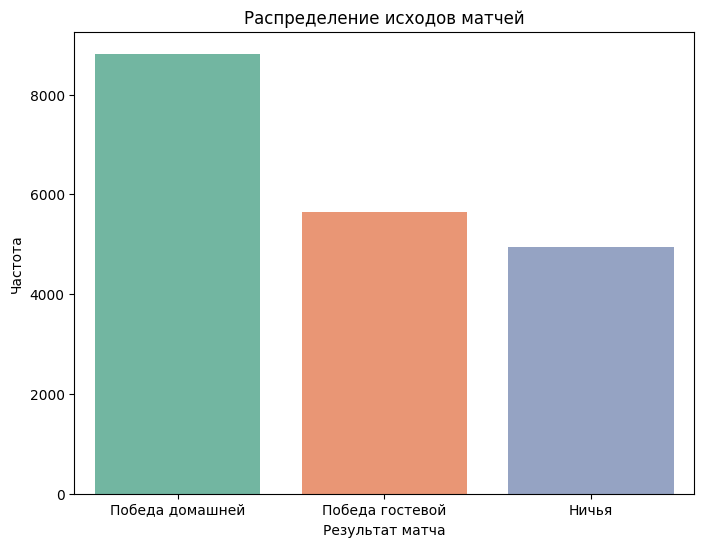

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='match_result', data=data, palette='Set2')

plt.title('Распределение исходов матчей')
plt.xlabel('Результат матча')
plt.ylabel('Частота')

plt.xticks(ticks=[0, 1, 2], labels=['Победа домашней', 'Победа гостевой', 'Ничья'])

plt.show()

Предсказание победы домашней/другой исход

In [ ]:
X = data.drop(columns=['id', 'country_name', 'league_name', 'season', 'stage', 'date', 'home_team', 'away_team', 'home_team_goal', 'away_team_goal', 'home_win', 'away_win', 'draw', 'match_result'])
y = data['home_win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

In [ ]:
model_home = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model_home.fit(X_train, y_train)
y_pred = model_home.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6525


In [ ]:
feature_names = X_train.columns
coefficients = model_home.coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

                              Feature  Coefficient
24                                VCH     1.802073
25                                VCD    -0.925800
1                               B365D    -0.892996
8                                 BWA    -0.613928
23                                SJA    -0.594264
11                                GBA    -0.517518
26                                VCA    -0.410018
18                                PSH     0.359906
0                               B365H     0.286795
48          AT_chanceCreationShooting     0.275792
43            AT_buildUpPlayDribbling    -0.147165
50                 AT_defencePressure     0.112555
47          AT_chanceCreationCrossing    -0.093697
32              HT_buildUpPlayPassing     0.090250
38                 HT_defencePressure     0.085314
14                                IWA     0.078133
60                     away_avg_goals    -0.067685
45     AT_buildUpPlayPositioningClass    -0.067471
34           HT_chanceCreationP

Предсказание победы гостевой/другой исход

In [ ]:
X = data.drop(columns=['id', 'country_name', 'league_name', 'season', 'stage', 'date', 'home_team', 'away_team', 'home_team_goal', 'away_team_goal', 'home_win', 'away_win', 'draw', 'match_result'])
y = data['away_win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

In [ ]:
model_away = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model_away.fit(X_train, y_train)
y_pred = model_away.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7218


In [ ]:
feature_names = X_train.columns
coefficients = model_away.coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

                              Feature  Coefficient
24                                VCH    -1.634295
23                                SJA     1.513718
18                                PSH    -0.812619
26                                VCA     0.715058
11                                GBA     0.532078
28                                WHD     0.441753
31            HT_buildUpPlayDribbling    -0.322480
43            AT_buildUpPlayDribbling     0.307097
25                                VCD     0.247590
14                                IWA    -0.229955
35          HT_chanceCreationCrossing     0.227890
48          AT_chanceCreationShooting    -0.217025
32              HT_buildUpPlayPassing     0.200731
38                 HT_defencePressure     0.198687
41        HT_defenceDefenderLineClass    -0.159291
39               HT_defenceAggression     0.144480
33     HT_buildUpPlayPositioningClass    -0.140201
1                               B365D     0.128630
51               AT_defenceAggr

Предсказание ничьи/другой исход

In [ ]:
X = data.drop(columns=['id', 'country_name', 'league_name', 'season', 'stage', 'date', 'home_team', 'away_team', 'home_team_goal', 'away_team_goal', 'home_win', 'away_win', 'draw', 'match_result'])
y = data['draw']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

In [ ]:
model_draw = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model_draw.fit(X_train, y_train)
y_pred = model_draw.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7447


In [ ]:
feature_names = X_train.columns
coefficients = model_draw.coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

                              Feature  Coefficient
10                                GBD     3.452320
13                                IWD     1.427345
0                               B365H    -1.037939
2                               B365A    -0.733880
5                                 BSA    -0.615663
6                                 BWH    -0.535521
20                                PSA    -0.497202
31            HT_buildUpPlayDribbling     0.372680
30                HT_buildUpPlaySpeed     0.241445
9                                 GBH    -0.202503
33     HT_buildUpPlayPositioningClass     0.198269
40                HT_defenceTeamWidth     0.177091
34           HT_chanceCreationPassing     0.159787
47          AT_chanceCreationCrossing     0.147736
23                                SJA    -0.144206
51               AT_defenceAggression     0.090373
39               HT_defenceAggression     0.086268
46           AT_chanceCreationPassing     0.085190
57                     home_avg

Вероятности для каждого исхода по всем матчам

In [ ]:
home_win_prob = model_home.predict_proba(X)[:, 1]
away_win_prob = model_away.predict_proba(X)[:, 1]
draw_prob = model_draw.predict_proba(X)[:, 1]

total_prob = home_win_prob + away_win_prob + draw_prob
home_win_prob /= total_prob
away_win_prob /= total_prob
draw_prob /= total_prob

predicted_classes = np.argmax(np.array([home_win_prob, away_win_prob, draw_prob]), axis=0)

In [ ]:
accuracy = accuracy_score(data['match_result'], predicted_classes)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5195


In [ ]:
predictions_df = pd.DataFrame({
    'match_id': data['id'],
    'country': data['country_name'],
    'league': data['league_name'],
    'season': data['season'],
    'date': data['date'],
    'home_team': data['home_team'],
    'away_team': data['away_team'],
    'home_win_prob': home_win_prob,
    'away_win_prob': away_win_prob,
    'draw_prob': draw_prob,
    'predicted_class': predicted_classes
})

predictions_df.to_csv('predictions.csv', index=False)

Вывод: лучший букмекер для ставки на победу домашней команды **VCH**, для победы гостевой - **SJA**, для ничьи - **GBD**.

# Расчет силы команды для межлиговых матчей

In [ ]:
# Отфильтровываем данные по последнему сезону
last_season = data["season"].max()
data_last_season = data[data["season"] == last_season]

In [ ]:
# Рассчитаем средние значения для аттрибутов команд по лигам
league_metrics = data_last_season.groupby("league_name").agg(
    avg_HT_buildUpPlayIndex=("HT_buildUpPlayIndex", "mean"),
    avg_AT_buildUpPlayIndex=("AT_buildUpPlayIndex", "mean"),
    avg_HT_chanceCreationIndex=("HT_chanceCreationIndex", "mean"),
    avg_AT_chanceCreationIndex=("AT_chanceCreationIndex", "mean"),
    avg_HT_defenceIndex=("HT_defenceIndex", "mean"),
    avg_AT_defenceIndex=("AT_defenceIndex", "mean")
).reset_index()

# Определяем веса для каждого показателя
weights = {
    "avg_HT_buildUpPlayIndex": (1/6),
    "avg_AT_buildUpPlayIndex": (1/6),
    "avg_HT_chanceCreationIndex": (1/6),
    "avg_AT_chanceCreationIndex": (1/6),
    "avg_HT_defenceIndex": (1/6),
    "avg_AT_defenceIndex": (1/6)
}

# Рассчитываем силу лиги на основе средних значений и весов
league_metrics["league_strength"] = (
    weights["avg_HT_buildUpPlayIndex"] * league_metrics["avg_HT_buildUpPlayIndex"] +
    weights["avg_AT_buildUpPlayIndex"] * league_metrics["avg_AT_buildUpPlayIndex"] +
    weights["avg_HT_chanceCreationIndex"] * league_metrics["avg_HT_chanceCreationIndex"] +
    weights["avg_AT_chanceCreationIndex"] * league_metrics["avg_AT_chanceCreationIndex"] +
    weights["avg_HT_defenceIndex"] * league_metrics["avg_HT_defenceIndex"] +
    weights["avg_AT_defenceIndex"] * league_metrics["avg_AT_defenceIndex"]
)

league_metrics = league_metrics[["league_name", "league_strength"]]
league_metrics.head()

,league_name,league_strength
0,Belgium Jupiler League,0.524975
1,England Premier League,0.515558
2,France Ligue 1,0.515100
3,Germany 1. Bundesliga,0.537905
4,Italy Serie A,0.523096


In [ ]:
# Рассчитываем метрики для каждой команды (домашней и гостевой)
home_metrics = data_last_season.groupby("home_team").agg(
    avg_home_goals=("home_team_goal", "mean"),
    avg_home_wins=("home_win", "mean"),
    avg_home_draws=("draw", "mean")
).reset_index().rename(columns={"home_team": "team_name"})

away_metrics = data_last_season.groupby("away_team").agg(
    avg_away_goals=("away_team_goal", "mean"),
    avg_away_wins=("away_win", "mean"),
    avg_away_draws=("draw", "mean")
).reset_index().rename(columns={"away_team": "team_name"})

# Расчет поражений для каждой команды
home_metrics["avg_home_losses"] = 1 - home_metrics["avg_home_wins"] - home_metrics["avg_home_draws"]
away_metrics["avg_away_losses"] = 1 - away_metrics["avg_away_wins"] - away_metrics["avg_away_draws"]

# Объединяем данные
team_metrics = pd.merge(home_metrics, away_metrics, on="team_name", how="outer").fillna(0)

# Рассчитываем средние значения для каждой команды
team_metrics["avg_goals_team"] = (team_metrics["avg_home_goals"] + team_metrics["avg_away_goals"]) / 2
team_metrics["avg_wins_team"] = (team_metrics["avg_home_wins"] + team_metrics["avg_away_wins"]) / 2
team_metrics["avg_draws_team"] = (team_metrics["avg_home_draws"] + team_metrics["avg_away_draws"]) / 2
team_metrics["avg_losses_team"] = (team_metrics["avg_home_losses"] + team_metrics["avg_away_losses"]) / 2

In [ ]:
# Добавляем лигу для каждой команды
team_league = data_last_season[["home_team", "league_name"]].drop_duplicates().rename(columns={"home_team": "team_name"})
team_metrics = pd.merge(team_metrics, team_league, on="team_name", how="left")

In [ ]:
# Рассчитаем силу команд
team_weight = 0.7
team_strength = pd.merge(team_metrics, league_metrics, on="league_name")

team_strength["team_strength"] = (
    team_weight * (team_strength["avg_goals_team"] + team_strength["avg_wins_team"]) +
    (1 - team_weight) * (team_strength["league_strength"])
)

In [ ]:
team_strength[["team_name", "team_strength"]].head()

,team_name,team_strength
0,1. FC Köln,1.145468
1,1. FSV Mainz 05,1.392527
2,ADO Den Haag,1.336914
3,AS Monaco,1.517075
4,AS Saint-Étienne,1.240759
